In [5]:
import numpy as np
import pandas as pd
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid', 'navy', 'brown'])

# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.labelpad'] = 9.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.framealpha'] = 1.
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
mpl.rcParams['figure.figsize'] = 12, 6

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

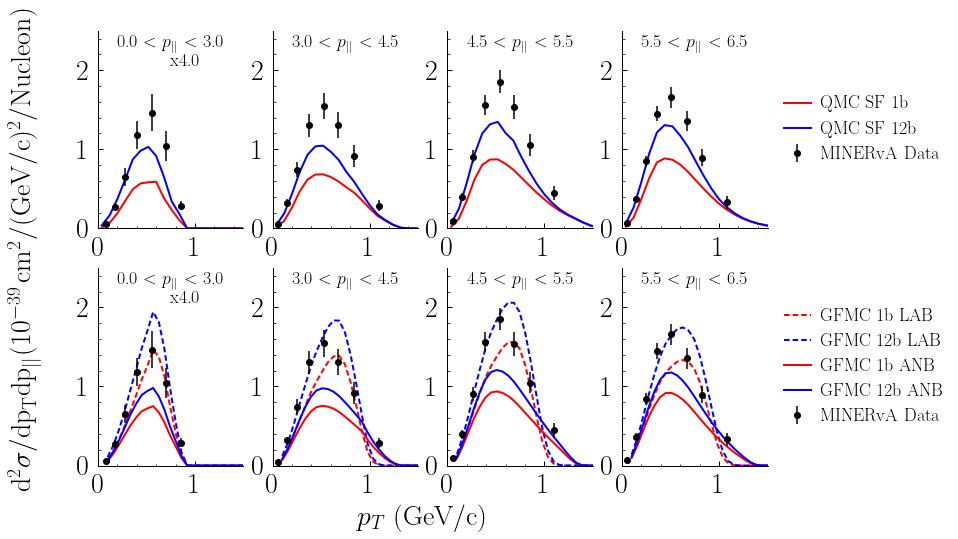

In [98]:
#(*Inputing MC predictions with form factor errors*)
#Grab prediction
pred_dir='/Users/noah/Physics/Fermilab/MINERvA_fluxfolding/fluxfolded_src/'
data_dir='~/Desktop/txtfiles/'

dipole_file = pred_dir+f'MINERvA_Q2t.out'
data_files = ['CH_00_30.txt', 'CH_30_45.txt', 'CH_45_55.txt', 'CH_55_65.txt', 'CH_65_80.txt', 'CH_80_120.txt']
data_files = [data_dir+x for x in data_files]

MEC_files = ['xsec_2b_pl_0to3.out','xsec_2b_pl_3to4p5.out','xsec_2b_pl_4p5to5p5.out','xsec_2b_pl_5p5to6p5.out']
MEC_files = [pred_dir+x for x in MEC_files]

MEC_dfs = [pd.read_csv(file,sep="\s+|\t+|\s+\t+|\t+\s+",header=None, engine='python') for file in MEC_files] 
for i in range(0,4):
    MEC_dfs[i].columns = ['pT', 'xsec', 'xsec_err']
    MEC_dfs[i]['pz_range'] = i+1
    MEC_dfs[i].dropna()
    
MEC_df = pd.concat([MEC_dfs[0], MEC_dfs[1], MEC_dfs[2], MEC_dfs[3]])

dipole_df = pd.read_csv(dipole_file,sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

data_dfs = [pd.read_csv(file,sep="\s+|\t+|\s+\t+|\t+\s+",header=None, engine='python') for file in data_files] 
for i in range (0,6):
    data_dfs[i].columns = ['pT', 'xsec', 'xsec_max','xsec_min','multiplier']
    data_dfs[i]['xsec_err'] = data_dfs[i]['xsec_max'] - data_dfs[i]['xsec']
    data_dfs[i]['pz_range'] = i+1
    data_dfs[i].dropna() 
    
data_df = pd.concat([data_dfs[0],data_dfs[1],data_dfs[2],data_dfs[3],data_dfs[4],data_dfs[5]])

dipole_df.columns = ['pz_range', 'pT', 'xsec','xsec_err']
dipole_df['pT'] = dipole_df['pT']/1000
dipole_df['xsec'] = 1.0e+39*(1e6)*dipole_df['xsec']/1.0e+26
dipole_df['xsec_err'] = 1.0e+39*(1e6)*dipole_df['xsec_err']/1.0e+26
dipole_df.dropna()  

GFMC_ANB_df = pd.read_csv("Minerva_bins_HEflux2_ANB_FNL.out",sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
GFMC_LAB_df = pd.read_csv("Minerva_bins_HEflux2_LAB_FNL.out",sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')

GFMC_ANB_df.columns = ["pzmin", "pzmax", "pT", "1b", "12b"]
GFMC_LAB_df.columns = ["pzmin", "pzmax", "pT", "1b", "12b"]
GFMC_LAB_df["1b"] = GFMC_LAB_df["1b"]*12/13
GFMC_ANB_df["1b"] = GFMC_ANB_df["1b"]*12/13
GFMC_LAB_df["12b"] = GFMC_LAB_df["12b"]*12/13
GFMC_ANB_df["12b"] = GFMC_ANB_df["12b"]*12/13
GFMC_LAB_df["pT"] = GFMC_LAB_df["pT"]/1000
GFMC_ANB_df["pT"] = GFMC_ANB_df["pT"]/1000

pz_to_i = {0:3000, 1:4500, 2:5500, 3:6500}
pz_bins = [0., 3., 4.5, 5.5, 6.5, 8.0, 12.0, 30.0]
pz_scale_factors = [4.,1.0,1.0,1.0,2.0,10.0,100.0]

fig,axs = plt.subplots(2,4,figsize=(12, 8))
#fig.subplots_adjust(wspace=0)
axs = axs.flatten()
#axs[7].axis('off')


labels = [r'QMC SF 1b', r'QMC SF 12b' ,'MINERvA Data']
labelsGFMC = ['GFMC 1b LAB', 'GFMC 12b LAB', 'GFMC 1b ANB', 'GFMC 12b ANB']
    
for i in range (0,4): 
    axs[i].text(.5,.92,r'{pZlow} $<$ {pzstring} $<$ {pZhigh}'.format(pZlow = pz_bins[i], pzstring = r'$p_{||}$', pZhigh = pz_bins[i+1]), fontsize=18,
            horizontalalignment='center',
            transform=axs[i].transAxes)

    if(pz_scale_factors[i] != 1.0):
        axs[i].text(.60,.82,"x{times}".format(times = pz_scale_factors[i]), fontsize=18,
            horizontalalignment='center',
            transform=axs[i].transAxes)

    axs[i].set_ylim(0,2.5)
    axs[i].set_xlim(0,1.5)
    
    axs[i].xaxis.set_tick_params(labelsize=28)
    axs[i].yaxis.set_tick_params(labelsize=28)
    
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].get_xaxis().tick_bottom()
    axs[i].get_yaxis().tick_left()
        
    axs[i].plot(dipole_df[dipole_df['pz_range'] == i+1]['pT'],pz_scale_factors[i]*dipole_df[dipole_df['pz_range'] == i+1]['xsec'].values,label=labels[0], color='red',linewidth=2.0)
    
    axs[i].plot(dipole_df[dipole_df['pz_range'] == i+1]['pT'],pz_scale_factors[i]*MEC_df[MEC_df['pz_range'] == i+1]['xsec'].values + pz_scale_factors[i]*dipole_df[dipole_df['pz_range'] == i+1]['xsec'].values,label=labels[1], color='blue',linewidth=2.0)
    
    axs[i].errorbar(data_df[data_df['pz_range'] == i+1]['pT'].values, data_df[data_df['pz_range'] == i+1]['xsec'].values, yerr=data_df[data_df['pz_range'] == i+1]['xsec_err'].values, xerr=None, fmt="ko",label=labels[2],ecolor='black')
    
for i in range(4,8):
    axs[i].text(.5,.92,r'{pZlow} $<$ {pzstring} $<$ {pZhigh}'.format(pZlow = pz_bins[i-4], pzstring = r'$p_{||}$', pZhigh = pz_bins[i+1-4]), fontsize=18,
            horizontalalignment='center',
            transform=axs[i].transAxes)

    if(pz_scale_factors[i-4] != 1.0):
        axs[i].text(.60,.82,"x{times}".format(times = pz_scale_factors[i-4]), fontsize=18,
            horizontalalignment='center',
            transform=axs[i].transAxes)

    axs[i].set_ylim(0,2.5)
    axs[i].set_xlim(0,1.5)
    
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].get_xaxis().tick_bottom()
    axs[i].get_yaxis().tick_left()
    
    axs[i].xaxis.set_tick_params(labelsize=28)
    axs[i].yaxis.set_tick_params(labelsize=28)
    
    axs[i].plot(GFMC_LAB_df[GFMC_LAB_df["pzmax"] == pz_to_i[i-4]]['pT'].values, pz_scale_factors[i-4]*GFMC_LAB_df[GFMC_LAB_df["pzmax"] == pz_to_i[i-4]]['1b'].values,label=labelsGFMC[0],color='red',linestyle='dashed',linewidth=2.0)
    
    axs[i].plot(GFMC_LAB_df[GFMC_LAB_df["pzmax"] == pz_to_i[i-4]]['pT'].values, pz_scale_factors[i-4]*GFMC_LAB_df[GFMC_LAB_df["pzmax"] == pz_to_i[i-4]]['12b'].values,label=labelsGFMC[1],color='blue',linestyle='dashed',linewidth=2.0)
    
    axs[i].plot(GFMC_ANB_df[GFMC_ANB_df["pzmax"] == pz_to_i[i-4]]['pT'].values, pz_scale_factors[i-4]*GFMC_ANB_df[GFMC_ANB_df["pzmax"] == pz_to_i[i-4]]['1b'].values,label=labelsGFMC[2],color='red',linewidth=2.0)
    
    axs[i].plot(GFMC_ANB_df[GFMC_ANB_df["pzmax"] == pz_to_i[i-4]]['pT'].values, pz_scale_factors[i-4]*GFMC_ANB_df[GFMC_ANB_df["pzmax"] == pz_to_i[i-4]]['12b'].values,label=labelsGFMC[3],color='blue',linewidth=2.0)
    
    axs[i].errorbar(data_df[data_df['pz_range'] == i+1-4]['pT'].values, data_df[data_df['pz_range'] == i+1-4]['xsec'].values, yerr=data_df[data_df['pz_range'] == i+1-4]['xsec_err'].values, xerr=None, fmt="ko",label=labels[2],ecolor='black')
    
axs[3].legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size': 18})
axs[7].legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size': 18})

#axs[0].set_ylabel(r'$\rm{d}^{2}\sigma/\rm{dp}_{\rm{T}}\rm{dp}_{||}(10^{-39}\,\rm{cm}^{2}/(\rm{GeV}/\rm{c})^{2}/\rm{Nucleon})$',fontsize=28,color='black')
#axs[4].set_ylabel(r'$\rm{d}^{2}\sigma/\rm{dp}_{\rm{T}}\rm{dp}_{||}(10^{-39}\,\rm{cm}^{2}/(\rm{GeV}/\rm{c})^{2}/\rm{Nucleon})$',fontsize=28,color='black')

#axs[4].set_xlabel(r'$p_{T}$ [GeV/c]',fontsize=28)
#axs[5].set_xlabel(r'$p_{T}$ [GeV/c]',fontsize=28)
#axs[6].set_xlabel(r'$p_{T}$ [GeV/c]',fontsize=28)
#axs[7].set_xlabel(r'$p_{T}$ [GeV/c]',fontsize=28)
             
#fig.legend(labels=labels,loc=(.80,.55), prop={'size': 20},title_fontsize=20)
fig.supxlabel(r'$p_{T}$ (GeV/c)',fontsize=28)
fig.supylabel(r'$\rm{d}^{2}\sigma/\rm{dp}_{\rm{T}}\rm{dp}_{||}(10^{-39}\,\rm{cm}^{2}/(\rm{GeV}/\rm{c})^{2}/\rm{Nucleon})$',fontsize=28,color='black')
plt.savefig('SF_MINERvA.png',facecolor='white',bbox_inches='tight', dpi=300)

In [3]:
SF_df = pd.read_csv("Pke_c12_sep_python.out",sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
SF_df.drop(index=SF_df.index[0], axis=0, inplace=True)
SF_df.columns = ['p','E','S','S2','err','I']
SF_df = SF_df.drop(columns=['S2', 'err', 'I'])

hbarc=197.327053
SF_df['p'] = SF_df['p']
SF_df['S'] = SF_df['S']

SF_dp = SF_df['p'].unique()[1] - SF_df['p'].unique()[0]
SF_dE = SF_df['E'].unique()[1] - SF_df['E'].unique()[0]
print(SF_dp)
print(SF_dE)
p = SF_df.p
E = SF_df.E
S = SF_df.S

Integral = 0
for x,y,z in zip(p,E,S):
    Integral = Integral + (4*np.pi*SF_dp*SF_dE*x*x*z)/((2.0*np.pi)**3)
print('QMC Integral = ', Integral)

SF_mom = SF_df.groupby(['p'])['S'].sum().reset_index()
SF_mom.columns = ['p', 'S']
SF_mom['S'] = SF_mom['S']*SF_dE

SF_E = SF_df.groupby('E').apply(lambda x: np.trapz(x['S'].mul(x['p']**2), x['p'])).reset_index()
SF_E.columns = ['E', 'S']
SF_E['S'] = SF_E['S']*4*np.pi/((2*np.pi)**3)

Integral = 0
for x,y in zip(SF_mom['p'].values, SF_mom['S'].values):
    Integral = Integral + x*x*SF_dp*4*np.pi*y/((2.0*np.pi)**3)

print('QMC momentum Integral = ', Integral)

Integral = 0
for x,y in zip(SF_E['E'].values, SF_E['S'].values):
    Integral = Integral + SF_dE*y

print('QMC energy Integral = ', Integral)

0.029999999999999985
0.5
QMC Integral =  5.989835501148361
QMC momentum Integral =  5.989835501148298
QMC energy Integral =  5.989749169138726


In [4]:
CBF_df = pd.read_csv("CBF_SF.out",sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python')
CBF_df.columns = ['E','p','S']
CBF_df['p'] = CBF_df['p']/hbarc
CBF_df['S'] = CBF_df['S']*6*(hbarc**3)*((2.0*np.pi)**3)
CBF_dp = CBF_df['p'][1] - CBF_df['p'][0]
CBF_dE = CBF_df['E'].unique()[1] - CBF_df['E'].unique()[0]
print(CBF_dp)
print(CBF_dE)
p = CBF_df.p
E = CBF_df.E
S = CBF_df.S

Integral = 0
for x,y,z in zip(p,E,S):
    Integral = Integral + 4*np.pi*CBF_dp*CBF_dE*x*x*z/((2.0*np.pi)**3)
print('CBF Integral = ', Integral)

CBF_mom = CBF_df.groupby(['p'])['S'].sum().reset_index()
CBF_mom.columns = ['p', 'S']
CBF_mom['S'] = CBF_mom['S']*CBF_dE


CBF_E = CBF_df.groupby('E').apply(lambda x: np.trapz(x['S'].mul(x['p']**2), x['p'])).reset_index()
CBF_E.columns = ['E', 'S']
CBF_E['S'] = CBF_E['S']*4*np.pi/((2*np.pi)**3)

#CBF_energies = CBF_df['E'].unique()
#CBF_E = []
#for e in CBF_energies:
#    moms = CBF_df[CBF_df['E'] == e]['p'].values
#    Ss = CBF_df[CBF_df['E'] == e]['S'].values
#    integral = 0
#    for x,y in zip(moms,Ss):
#        integral = integral + 4*np.pi*x*x*CBF_dp*S/((2*np.pi)**3)
#    CBF_E.append(integral)

Integral = 0
for x,y in zip(CBF_mom['p'].values, CBF_mom['S'].values):
    Integral = Integral + x*x*CBF_dp*4*np.pi*y/((2.0*np.pi)**3)
print('CBF momentum Integral normalizing = ', Integral)

Integral = 0
for x,y in zip(CBF_E['E'].values, CBF_E['S'].values):
    Integral = Integral + CBF_dE*y

print('CBF energy Integral = ', Integral)

0.010008764485019701
5.0
CBF Integral =  5.997784700088482
CBF momentum Integral normalizing =  5.997784700088561
CBF energy Integral =  5.9975770492961455


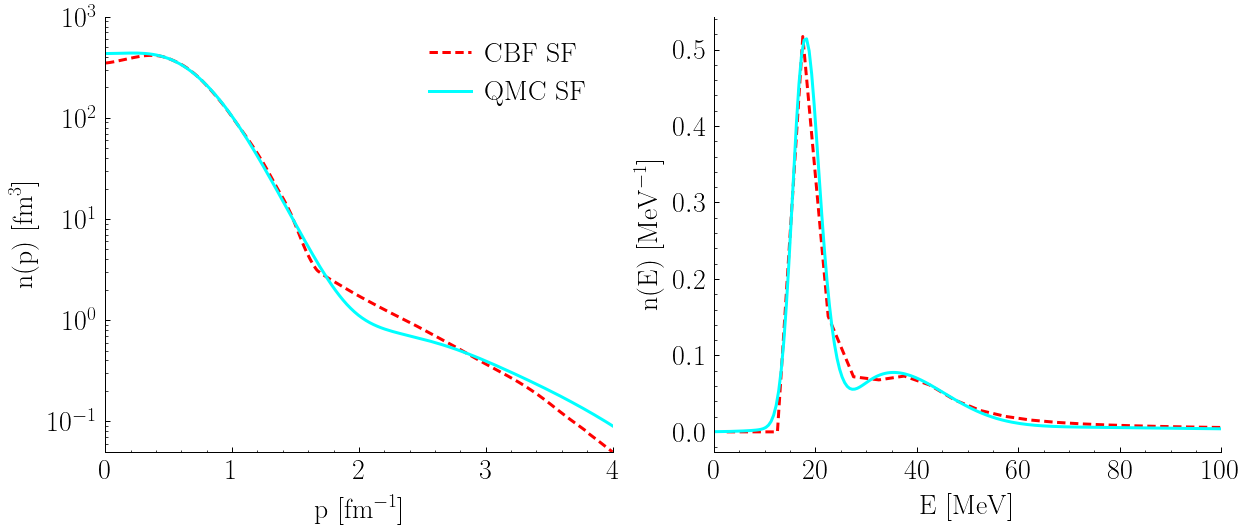

In [12]:
fig,axs = plt.subplots(1,2,figsize=(20, 8))
#fig.subplots_adjust(wspace=0,hspace=0)

axs[0].plot(CBF_mom['p'], CBF_mom['S'],label='CBF SF',linewidth=3.0,color='red',linestyle='dashed')
axs[0].plot(SF_mom['p'], SF_mom['S'],label='QMC SF',linewidth=3.0,color='cyan')
axs[0].set_yscale('log')
axs[0].set_xlim(0,4)
axs[0].set_ylim(5e-2, 1e3)
axs[0].get_xaxis().tick_bottom()
axs[0].get_yaxis().tick_left()
axs[0].set_xlabel(r'p [$\rm{fm}^{-1}$]',fontsize=28)
axs[0].set_ylabel(r'n(p) $[\rm{fm}^{3}]$',fontsize=28)
axs[0].legend(fontsize=28)


axs[0].xaxis.set_tick_params(labelsize=28)
axs[0].yaxis.set_tick_params(labelsize=28)

axs[1].plot(CBF_E['E'], CBF_E['S'],label='CBF SF',linewidth=3.0, color='red',linestyle='dashed')
axs[1].plot(SF_E['E'], SF_E['S'],label='QMC SF',linewidth=3.0,color='cyan')
#axs[1].set_yscale('log')
axs[1].set_xlim(0,100)
#axs[0].set_ylim(5e-2, 1e3)
axs[1].get_xaxis().tick_bottom()
axs[1].get_yaxis().tick_left()
axs[1].set_xlabel(r'E [$\rm{MeV}$]',fontsize=28)
axs[1].set_ylabel(r'n(E) $[\rm{MeV}^{-1}]$',fontsize=28)

axs[1].xaxis.set_tick_params(labelsize=28)
axs[1].yaxis.set_tick_params(labelsize=28)

axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].get_xaxis().tick_bottom()
axs[0].get_yaxis().tick_left()

axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].get_xaxis().tick_bottom()
axs[1].get_yaxis().tick_left()

#left,bottom,width,height = [0.68, 0.6, 0.2, 0.2]
#ax2 = fig.add_axes([left, bottom, width, height])
#ax2.set_yscale('log')
#ax2.plot(CBF_E['E'], CBF_E['S'],linewidth=3.0)
#ax2.plot(SF_E['E'], SF_E['S'],linewidth=3.0)
#ax2.set_xlim(12,50)
#ax2.set_ylim(.01,.6)

plt.savefig('C12_comparison.png',facecolor='white',bbox_inches='tight', dpi=300)

In [13]:
import uproot 
import awkward as ak
path = "/Users/noah/Physics/Fermilab/Fortran_Wrapper/Noemi-electron-QEL/src/Original/"
data_file = uproot.open("/Users/noah/Physics/Fermilab/Fortran_Wrapper/Noemi-electron-QEL/Plotting/Validation_backup.root")
experiments = data_file["expxsectree"]
branches = experiments.arrays()

MECfiles = [path+"MEC_results/C12_620_60_2b_FSI2_harry_full_v3.out", path+"MEC_results/C12_1108_37p5_2b_FSI2_harry_full_v3.out"]

MEC_df = [pd.read_csv(x,sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python') for x in MECfiles]
MEC_df[0].columns = ["E_trans", "dsigma", "dsigma_err"]
MEC_df[1].columns = ["E_trans", "dsigma", "dsigma_err"]
MEC_df[0]['E_trans'] = MEC_df[0]['E_trans']/1000
MEC_df[1]['E_trans'] = MEC_df[1]['E_trans']/1000
MEC_df[0]['dsigma'] = MEC_df[0]['dsigma']/1000
MEC_df[1]['dsigma'] = MEC_df[1]['dsigma']/1000

QEfiles = [path+"C12_QMC_620_60p0.out", path+"C12_QMC_1108_37p5.out"]

QE_df = [pd.read_csv(x,sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python') for x in QEfiles]
QE_df[0].columns = ["E_trans", "dsigma"]
QE_df[1].columns = ["E_trans", "dsigma"]
QE_df[0]['E_trans'] = QE_df[0]['E_trans']/1000
QE_df[1]['E_trans'] = QE_df[1]['E_trans']/1000
QE_df[0]['dsigma'] = QE_df[0]['dsigma']/1000
QE_df[1]['dsigma'] = QE_df[1]['dsigma']/1000

CBFQEfiles = [path+"C12_CBF_620_60p0.out", path+"C12_CBF_1108_37p5.out"]

CBF_QE_df = [pd.read_csv(x,sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python') for x in CBFQEfiles]
CBF_QE_df[0].columns = ["E_trans", "dsigma"]
CBF_QE_df[1].columns = ["E_trans", "dsigma"]
CBF_QE_df[0]['E_trans'] = CBF_QE_df[0]['E_trans']/1000
CBF_QE_df[1]['E_trans'] = CBF_QE_df[1]['E_trans']/1000
CBF_QE_df[0]['dsigma'] = CBF_QE_df[0]['dsigma']/1000
CBF_QE_df[1]['dsigma'] = CBF_QE_df[1]['dsigma']/1000

GFMC_path = "/Users/noah/Physics/Fermilab/MINERvA_fluxfolding/fluxfolded_src/GFMC_electrons/"
GFMC_ANB_files = [GFMC_path+"GFMC_ANB_E620_TH6000.dat", GFMC_path+"GFMC_ANB_E1108_TH3750.dat"]

GFMC_LAB_files = [GFMC_path+"GFMC_LAB_E620_TH6000.dat", GFMC_path+"GFMC_LAB_E1108_TH3750.dat"]

GFMC_LAB_df = [pd.read_csv(x,sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python') for x in GFMC_LAB_files]
GFMC_ANB_df = [pd.read_csv(x,sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python') for x in GFMC_ANB_files]
GFMC_LAB_df[0].columns = ["E_trans", "1b", "1blow", "1bhigh", "12b", "12blow", "12bhigh"]
GFMC_LAB_df[1].columns = ["E_trans", "1b", "1blow", "1bhigh", "12b", "12blow", "12bhigh"]
GFMC_ANB_df[0].columns = ["E_trans", "1b", "1blow", "1bhigh", "12b", "12blow", "12bhigh"]
GFMC_ANB_df[1].columns = ["E_trans", "1b", "1blow", "1bhigh", "12b", "12blow", "12bhigh"]

In [14]:
myEnergy2 = (branches['E_lepton'] == 1.108)
myAngle2 = (branches['theta_lepton'] == 37.5)

myEnergy1 = (branches['E_lepton'] == .620)
myAngle1 = (branches['theta_lepton'] == 60.0)

myZ = (branches['Z'] == 6)

masks = [myEnergy1 & myAngle1 & myZ, myEnergy2 & myAngle2 & myZ]

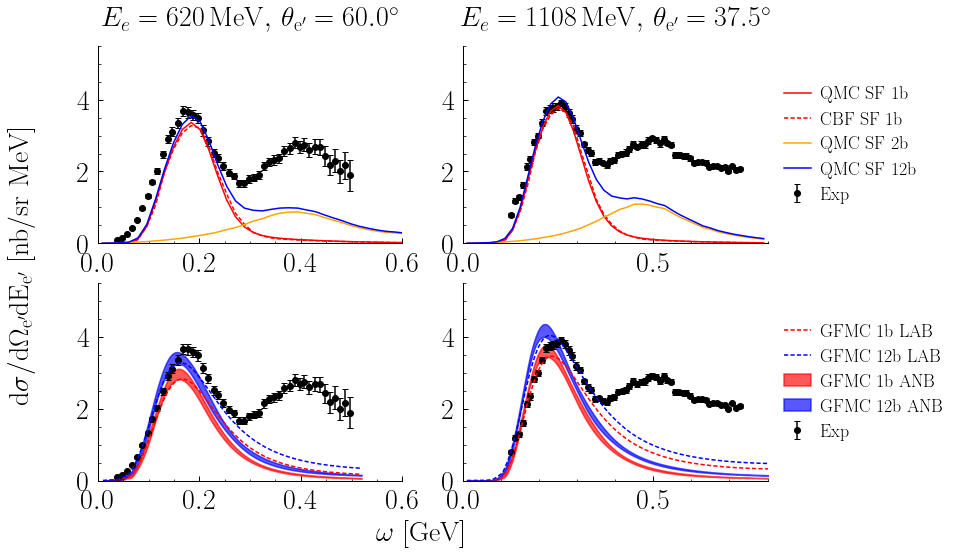

In [17]:
#np.array(branches['dsigma'][my961 & my37p5])
fig,ax = plt.subplots(2,2,figsize=(12, 8))

exp_labels = ['Barreau:1983ht', 'Sealock:1989nx']
Energy = [620, 1108]
Angle = [60.0,37.5]

ax = ax.flatten()
for i in range(0,2):
    ax[i].errorbar((branches['E_trans'][masks[i]]), (branches['dsigma'][masks[i]])/1000, yerr=(branches['syserror'][masks[i]] + branches['randomerror'][masks[i]])/1000, fmt='o',color='black',label='Exp', barsabove=True,capsize=3)

    ax[i].plot(QE_df[i]['E_trans'], QE_df[i]['dsigma'], color='red', label = 'QMC SF 1b',linewidth=1.5)
    ax[i].plot(CBF_QE_df[i]['E_trans'], CBF_QE_df[i]['dsigma'], color='red',linestyle='dashed', label = 'CBF SF 1b',linewidth=1.5)
    ax[i].plot(MEC_df[i]['E_trans'], MEC_df[i]['dsigma'], color='orange', label = 'QMC SF 2b',linewidth=1.5)
    ax[i].plot(QE_df[i]['E_trans'], MEC_df[i]['dsigma'] + QE_df[i]['dsigma'], color='blue', label = 'QMC SF 12b',linewidth=1.5)
    #ax[i].set_xlabel(r"$\omega$ [GeV]",fontsize=28)
    #ax[i].set_ylabel(r"$\rm{d}\sigma/d\Omega_{e'}dE_{e'}$ [nb/sr MeV]",fontsize=28,color='black')
    ax[i].set_ylim([0,5.5])
    
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    
    
    ax[i].xaxis.set_tick_params(labelsize=28)
    ax[i].yaxis.set_tick_params(labelsize=28)
    
for i in range(2,4):
    ax[i].errorbar((branches['E_trans'][masks[i-2]]), (branches['dsigma'][masks[i-2]])/1000, yerr=(branches['syserror'][masks[i-2]] + branches['randomerror'][masks[i-2]])/1000, fmt='o',color='black',label='Exp', barsabove=True,capsize=3)
    
    ax[i].plot(GFMC_LAB_df[i-2]["E_trans"].values/1000, GFMC_LAB_df[i-2]["1b"].values/1000, color='red', linestyle='dashed', linewidth=1.5, label='GFMC 1b LAB')
    ax[i].plot(GFMC_LAB_df[i-2]["E_trans"].values/1000, GFMC_LAB_df[i-2]["12b"].values/1000, color='blue', linestyle='dashed', linewidth=1.5, label='GFMC 12b LAB')
   
    ax[i].fill_between(GFMC_ANB_df[i-2]["E_trans"].values/1000, GFMC_ANB_df[i-2]["1blow"].values/1000, GFMC_ANB_df[i-2]["1bhigh"].values/1000, color='red',  linewidth=1.5, label='GFMC 1b ANB',alpha = 0.65)
    ax[i].fill_between(GFMC_ANB_df[i-2]["E_trans"].values/1000, GFMC_ANB_df[i-2]["12blow"].values/1000, GFMC_ANB_df[i-2]["12bhigh"].values/1000, color='blue',  linewidth=1.5, label='GFMC 12b ANB',alpha = 0.65)
    
    ax[i].set_ylim([0,5.5])
    
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].xaxis.set_tick_params(labelsize=28)
    ax[i].yaxis.set_tick_params(labelsize=28)
    
ax[0].set_xlim([0,.6])
ax[1].set_xlim([0,.8])

ax[2].set_xlim([0,.6])
ax[3].set_xlim([0,.8])

ax[0].set_title(r"$E_{e}= 620\,\rm{MeV},\, \theta_{e'}=60.0^\circ$",fontsize=28, pad=20)
ax[1].set_title(r"$E_{e}= 1108\,\rm{MeV},\, \theta_{e'}=37.5^\circ$",fontsize=28, pad=20)

ax[1].legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size': 18})
ax[3].legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size': 18})

fig.supxlabel(r"$\omega$ [GeV]",fontsize=28)
fig.supylabel(r"$\rm{d}\sigma/d\Omega_{e'}dE_{e'}$ [nb/sr MeV]",fontsize=28,color='black')
plt.savefig('Electron_scattering_SF.png',facecolor='white',bbox_inches='tight', dpi=300)

In [10]:
import uproot 
import awkward as ak
path = "/Users/noah/Physics/Fermilab/Fortran_Wrapper/Noemi-electron-QEL/src/Original/"
data_file = uproot.open("/Users/noah/Physics/Fermilab/Fortran_Wrapper/Noemi-electron-QEL/Plotting/Validation_backup.root")
experiments = data_file["expxsectree"]
branches = experiments.arrays()

RLfiles = [path+"C12_QMC_RL_620_60p0.out", path+"C12_QMC_RL_1500_13p5.out"]
RTfiles = [path+"C12_QMC_RT_620_60p0.out", path+"C12_QMC_RT_1500_13p5.out"]

RL_df = [pd.read_csv(x,sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python') for x in RLfiles]
RT_df = [pd.read_csv(x,sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python') for x in RTfiles]

for i in range(0,2):
    RL_df[i].columns = ["E_trans", "dsigma"]
    RL_df[i]['E_trans'] = RL_df[i]['E_trans']/1000
    RL_df[i]['dsigma'] = RL_df[i]['dsigma']/1000
    
    RT_df[i].columns = ["E_trans", "dsigma"]
    RT_df[i]['E_trans'] = RT_df[i]['E_trans']/1000
    RT_df[i]['dsigma'] = RT_df[i]['dsigma']/1000

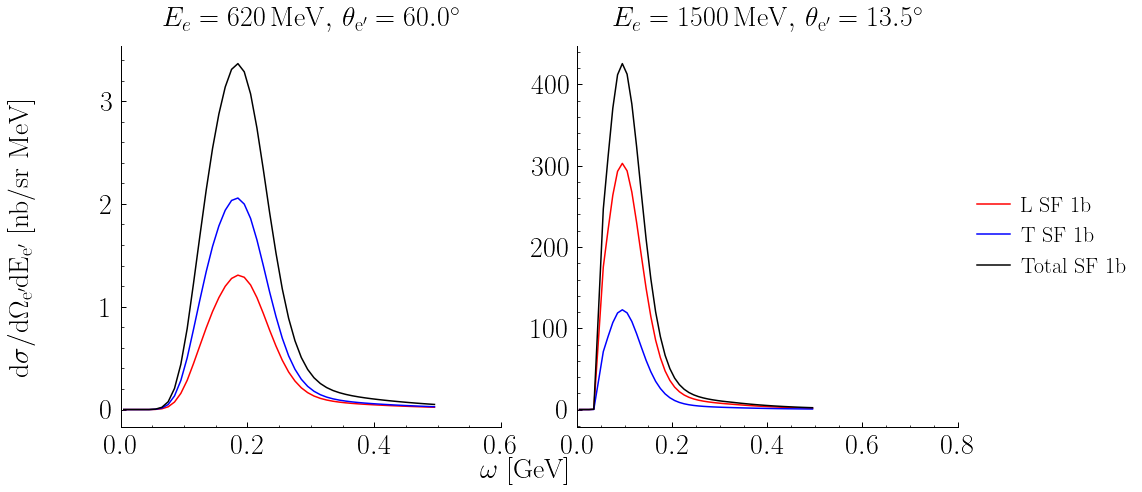

In [24]:
#np.array(branches['dsigma'][my961 & my37p5])
fig,ax = plt.subplots(1,2,figsize=(15, 7))

#exp_labels = ['Barreau:1983ht', 'Sealock:1989nx']
Energy = [620, 1500]
Angle = [60.0,13.5]

ax = ax.flatten()
for i in range(0,2):
    
    ax[i].plot(RL_df[i]['E_trans'], RL_df[i]['dsigma'], color='red', label = 'L SF 1b',linewidth=1.5)
    ax[i].plot(RT_df[i]['E_trans'], RT_df[i]['dsigma'], color='blue', label = 'T SF 1b',linewidth=1.5)
    ax[i].plot(RT_df[i]['E_trans'], RT_df[i]['dsigma'] + RL_df[i]['dsigma'], color='black', label = 'Total SF 1b',linewidth=1.5)
    
    #ax[i].set_ylim([0,5.5])
    
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    
    
    ax[i].xaxis.set_tick_params(labelsize=28)
    ax[i].yaxis.set_tick_params(labelsize=28)
    

    
ax[0].set_xlim([0,.6])
ax[1].set_xlim([0,.8])


ax[0].set_title(r"$E_{e}= 620\,\rm{MeV},\, \theta_{e'}=60.0^\circ$",fontsize=28, pad=20)
ax[1].set_title(r"$E_{e}= 1500\,\rm{MeV},\, \theta_{e'}=13.5^\circ$",fontsize=28, pad=20)


ax[1].legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size': 22})

fig.supxlabel(r"$\omega$ [GeV]",fontsize=28)
fig.supylabel(r"$\rm{d}\sigma/d\Omega_{e'}dE_{e'}$ [nb/sr MeV]",fontsize=28,color='black')
plt.savefig('Electron_scattering_SF_RLRT.png',facecolor='white',bbox_inches='tight', dpi=300)